## Gene Set Enrichment Analysis for AD Risk Genes
Author: Ru Feng and Jenny Empawi

### Motivation 
Perform gene set enrichment analysis for AD risk genes identified via xQTL. Highlight the pathway enrichment for novel genes to uncover new insights.

### Implementation
This notebook shows pathway enrichment analysis for the identified AD risk genes which includes:
* Real GVC list - 20 genes from GVC Table 2 (GO enrichment only)
* GVC list 1 - 76 genes (GO enrichment only)
* Strong list - overlapped between xQTL, GVC and TWAS (GO enrichment only)
* xQTL list (GO and KEGG enrichment)
* xQTL only list (GO and KEGG enrichment)
* TWAS only list (GO enrichment only)
* multi gene case - YPEL3, NBEAL1 (GO and KEGG enrichment for YPEL3; no KEGG plot because only one pathway enriched)

#### Load libraries

In [1]:
library(clusterProfiler)
library(org.Hs.eg.db)
library(data.table)
library(tidyverse)
library(STRINGdb)
library(pathview)
library(png)
library(grid)



clusterProfiler v4.14.0 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

G Yu. Thirteen years of clusterProfiler. The Innovation. 2024,
5(6):100722


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, saveRDS, setdiff, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading req

#### Load gene and TWAS list

In [2]:
#gene_list <- fread("/restricted/projectnb/xqtl/jaempawi/xqtl/Staging/variant_gene_summary/AD_xQTL_integration_summary/AD_genes_FunGen_AD_GVC_xQTL_20250325.tsv")  # path in BU cluster
gene_list <- fread("/data/resource/AD_genes_FunGen_AD_GVC_xQTL_20250325.tsv")  # path in cloud

#twas_list <- fread("/restricted/projectnb/xqtl/jaempawi/xqtl/Staging/variant_gene_summary/AD_xQTL_integration_summary/AD_genes_FunGen_AD_twas_GVC_xQTL_20250325.tsv")  # path in BU cluster
twas_list <- fread("/data/resource//AD_genes_FunGen_AD_twas_GVC_xQTL_20250325.tsv")  #path in cloud

out <- "" #your output directory

#### Real GVC list - 20 genes from GVC table 2

In [3]:
# Load real gvc list
real_gvc_list <- gene_list %>% filter(str_detect(data_resources, 'ADSP_GVC')) # 20 genes from GVC table2

In [4]:
# Run GO enrichment analysis for Biological Process (BP)
ego <- enrichGO(
  gene          = real_gvc_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 0.05,
  qvalueCutoff  = 0.2
)

# View results
head(ego)

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0042987,GO:0042987,amyloid precursor protein catabolic process,10/21,88/21468,0.11363636,116.16883,33.87540,2.684716e-19,4.295546e-16,1.910388e-16,ENSG00000064687/ENSG00000073921/ENSG00000080815/ENSG00000130203/ENSG00000136717/ENSG00000137642/ENSG00000137845/ENSG00000142192/ENSG00000143801/ENSG00000288674,10
GO:0042982,GO:0042982,amyloid precursor protein metabolic process,10/21,117/21468,0.08547009,87.37485,29.31455,5.233870e-18,4.187096e-15,1.862156e-15,ENSG00000064687/ENSG00000073921/ENSG00000080815/ENSG00000130203/ENSG00000136717/ENSG00000137642/ENSG00000137845/ENSG00000142192/ENSG00000143801/ENSG00000288674,10
GO:0034205,GO:0034205,amyloid-beta formation,8/21,66/21468,0.12121212,123.91342,31.29364,1.013675e-15,5.406266e-13,2.404366e-13,ENSG00000064687/ENSG00000073921/ENSG00000080815/ENSG00000130203/ENSG00000136717/ENSG00000137642/ENSG00000143801/ENSG00000288674,8
GO:0050435,GO:0050435,amyloid-beta metabolic process,8/21,74/21468,0.10810811,110.51737,29.53010,2.648481e-15,1.059393e-12,4.711509e-13,ENSG00000064687/ENSG00000073921/ENSG00000080815/ENSG00000130203/ENSG00000136717/ENSG00000137642/ENSG00000143801/ENSG00000288674,8
GO:0006509,GO:0006509,membrane protein ectodomain proteolysis,6/21,60/21468,0.10000000,102.22857,24.56986,1.935792e-11,6.194533e-09,2.754937e-09,ENSG00000080815/ENSG00000130203/ENSG00000137845/ENSG00000142192/ENSG00000143801/ENSG00000288674,6
GO:1902991,GO:1902991,regulation of amyloid precursor protein catabolic process,6/21,71/21468,0.08450704,86.39034,22.55140,5.501326e-11,1.467020e-08,6.524380e-09,ENSG00000064687/ENSG00000073921/ENSG00000130203/ENSG00000136717/ENSG00000137642/ENSG00000142192,6


Warning message in fortify(object, showCategory = showCategory, by = x, ...):
“Arguments in `...` must be used.
✖ Problematic argument:
• by = x
ℹ Did you misspell an argument name?”
Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the enrichplot package.
  Please report the issue at
  <https://github.com/GuangchuangYu/enrichplot/issues>.”


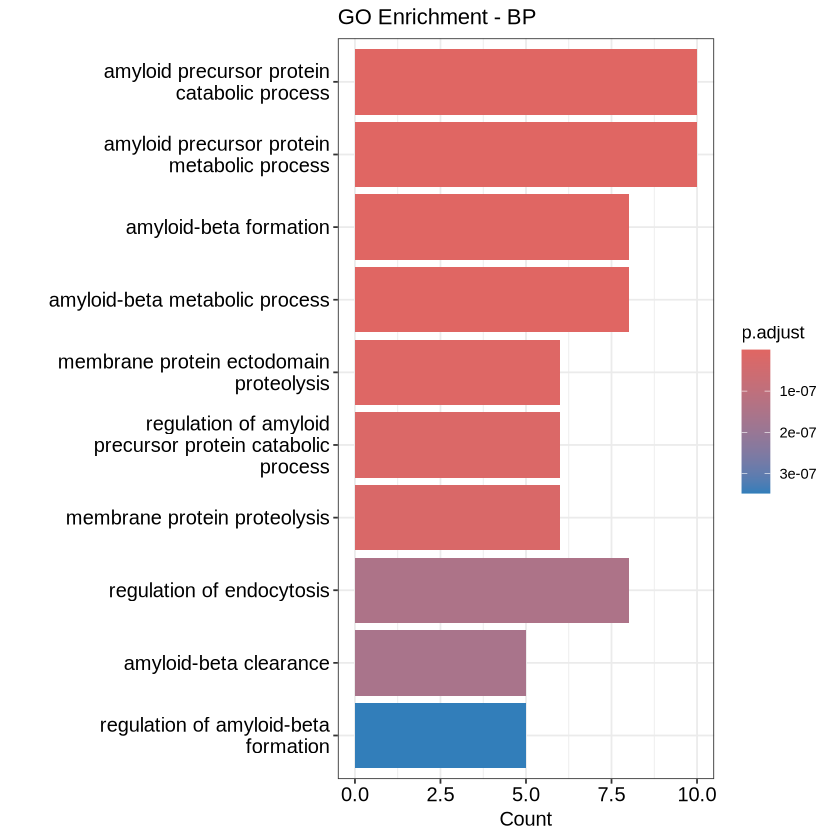

In [5]:
# Plot results
p1 <- barplot(ego, showCategory = 10, title = "GO Enrichment - BP")
p1

#### GVC list 1 - 76 genes

In [6]:
# Load gene reference
#gene_ref <- fread('/restricted/projectnb/xqtl/jaempawi/xqtl/Staging/manuscript/xQTL_flagship_2025/PPI/Homo_sapiens.GRCh38.103.chr.reformatted.collapse_only.gene.region_list') #path in BU cluster
gene_ref <- fread('/data/resource/references/Homo_sapiens.GRCh38.103.chr.reformatted.collapse_only.gene.region_list') # path in cloud


In [7]:
# Load gvc list1
#vc_table1 <- fread('/restricted/projectnb/xqtl/jaempawi/xqtl/Figure_5e/GVC - table1.tsv')  # path in BU cluster
gvc_table1 <- fread('/data/resource/staging_files/GVC - table1.tsv')  # path in cloud

# Set column names from the second row and remove header rows
colnames(gvc_table1) <- gvc_table1[2,] %>% as.character()
gvc_table1 <- gvc_table1[-c(1:2),]

# Map gene names to gene reference data and add resource identifier
gvc_table1 <- gene_ref %>% 
  filter(gene_name %in% gvc_table1$`Reported Gene/ Closest gene`) %>% 
  mutate(data_resource = 'FunGen_ADSP')

In [8]:
# Run GO enrichment analysis for Biological Process (BP)
gvc_table1_ego <- enrichGO(
  gene          = gvc_table1$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 0.05,
  qvalueCutoff  = 0.2
)

# View results
head(gvc_table1_ego)

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0050435,GO:0050435,amyloid-beta metabolic process,7/74,74/21468,0.09459459,27.442659,13.400794,6.472442e-09,1.442060e-05,9.592840e-06,ENSG00000136717/ENSG00000196549/ENSG00000120885/ENSG00000137642/ENSG00000138613/ENSG00000159640/ENSG00000064687,7
GO:0042987,GO:0042987,amyloid precursor protein catabolic process,7/74,88/21468,0.07954545,23.076781,12.204747,2.197501e-08,2.448017e-05,1.628464e-05,ENSG00000151694/ENSG00000136717/ENSG00000120885/ENSG00000137642/ENSG00000138613/ENSG00000064687/ENSG00000142192,7
GO:0042982,GO:0042982,amyloid precursor protein metabolic process,7/74,117/21468,0.05982906,17.356895,10.433745,1.585857e-07,1.177763e-04,7.834691e-05,ENSG00000151694/ENSG00000136717/ENSG00000120885/ENSG00000137642/ENSG00000138613/ENSG00000064687/ENSG00000142192,7
GO:0097242,GO:0097242,amyloid-beta clearance,5/74,48/21468,0.10416667,30.219595,11.919022,6.471593e-07,3.604677e-04,2.397896e-04,ENSG00000196549/ENSG00000095970/ENSG00000120885/ENSG00000064687/ENSG00000142192,5
GO:0030183,GO:0030183,B cell differentiation,7/74,149/21468,0.04697987,13.629240,9.097928,8.214581e-07,3.627321e-04,2.412958e-04,ENSG00000203710/ENSG00000151694/ENSG00000168918/ENSG00000120899/ENSG00000066336/ENSG00000095585/ENSG00000197943,7
GO:0002274,GO:0002274,myeloid leukocyte activation,9/74,309/21468,0.02912621,8.449751,7.757628,1.148803e-06,3.627321e-04,2.412958e-04,ENSG00000109684/ENSG00000168421/ENSG00000095970/ENSG00000120885/ENSG00000066336/ENSG00000197943/ENSG00000103241/ENSG00000030582/ENSG00000142192,9


Warning message in fortify(object, showCategory = showCategory, by = x, ...):
“Arguments in `...` must be used.
✖ Problematic argument:
• by = x
ℹ Did you misspell an argument name?”


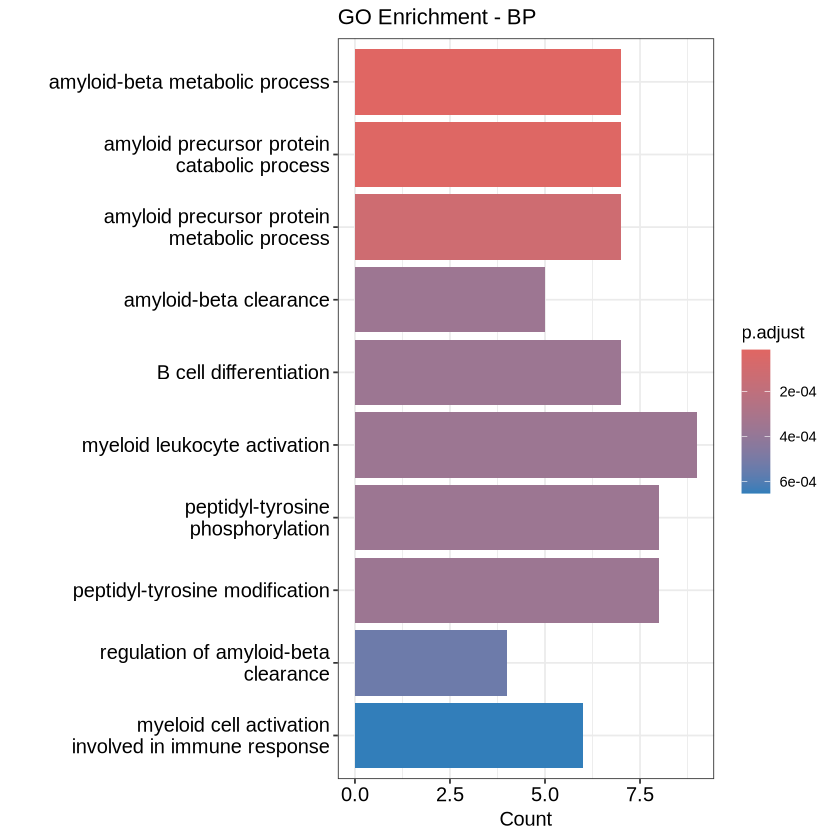

In [9]:
# Plot results
p2 <- barplot(gvc_table1_ego, showCategory = 10, title = "GO Enrichment - BP")
p2

#### Strong list - overlapped between xQTL, GVC and TWAS

In [10]:
# Intersect multiple gene_id vectors
gvc_list <- gene_list %>% filter(str_detect(data_resources, 'FunGen_AD_PI|ADSP_GVC')) # 20 genes + PIs' genes
strong_list <- Reduce(intersect, list(gvc_list$gene_id, gene_list$gene_id, twas_list$gene_id)) # the overlap between xQTL and gvc and twas

In [11]:
strong_list_ego <- enrichGO(
  gene          = strong_list,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 0.05,
  qvalueCutoff  = 0.2
)
head(strong_list_ego)

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0042987,GO:0042987,amyloid precursor protein catabolic process,6/21,88/21468,0.06818182,69.70130,20.20759,2.060524e-10,3.037212e-07,1.485746e-07,ENSG00000073921/ENSG00000130203/ENSG00000136717/ENSG00000137642/ENSG00000137845/ENSG00000142192,6
GO:0042982,GO:0042982,amyloid precursor protein metabolic process,6/21,117/21468,0.05128205,52.42491,17.45297,1.168628e-09,8.612788e-07,4.213211e-07,ENSG00000073921/ENSG00000130203/ENSG00000136717/ENSG00000137642/ENSG00000137845/ENSG00000142192,6
GO:1902991,GO:1902991,regulation of amyloid precursor protein catabolic process,5/21,71/21468,0.07042254,71.99195,18.74882,6.695020e-09,3.289487e-06,1.609154e-06,ENSG00000073921/ENSG00000130203/ENSG00000136717/ENSG00000137642/ENSG00000142192,5
GO:0097242,GO:0097242,amyloid-beta clearance,4/21,48/21468,0.08333333,85.19048,18.27199,1.280011e-07,4.716841e-05,2.307389e-05,ENSG00000073921/ENSG00000095970/ENSG00000130203/ENSG00000142192,4
GO:1902003,GO:1902003,regulation of amyloid-beta formation,4/21,57/21468,0.07017544,71.73935,16.73370,2.583716e-07,7.616796e-05,3.725991e-05,ENSG00000073921/ENSG00000130203/ENSG00000136717/ENSG00000137642,4
GO:0034205,GO:0034205,amyloid-beta formation,4/21,66/21468,0.06060606,61.95671,15.51952,4.687316e-07,1.151517e-04,5.633002e-05,ENSG00000073921/ENSG00000130203/ENSG00000136717/ENSG00000137642,4


Warning message in fortify(object, showCategory = showCategory, by = x, ...):
“Arguments in `...` must be used.
✖ Problematic argument:
• by = x
ℹ Did you misspell an argument name?”


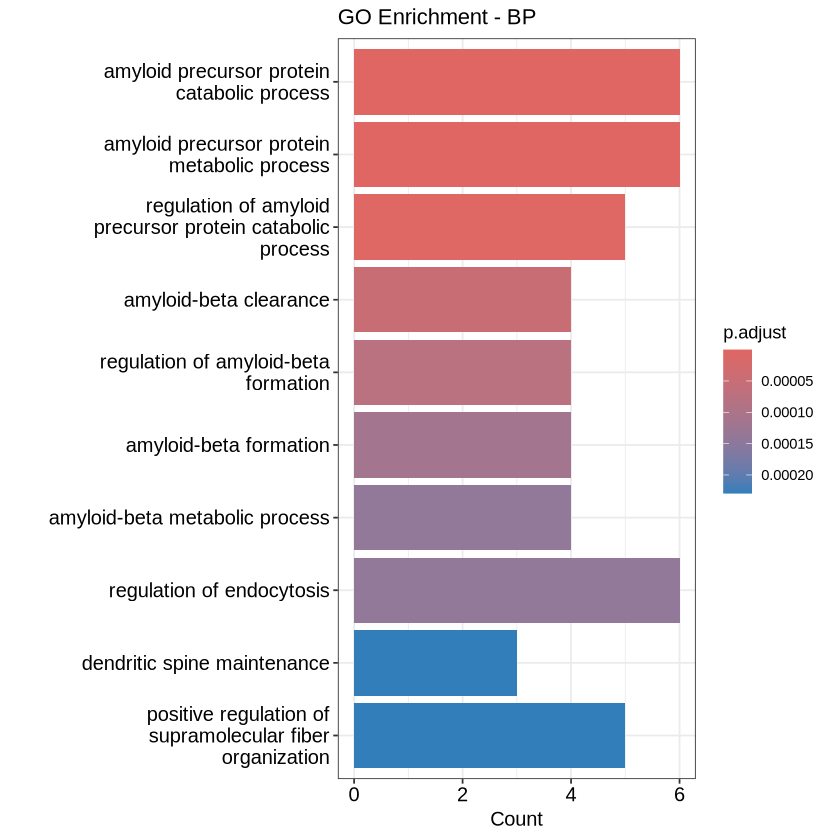

In [12]:
p3 <- barplot(strong_list_ego, showCategory = 10, title = "GO Enrichment - BP")
p3

#### xQTL list - GO enrichment

In [13]:
# Initialize STRINGdb (change species if needed, 9606 = Homo sapiens)
string_db <- STRINGdb$new(version="11.5", species=9606, score_threshold=400, input_directory="")

# Load xQTL list
xQTL_list <- gene_list %>% filter(str_detect(data_resources, 'FunGen_xQTL'))

# Load xQTL list
genes <- xQTL_list$gene_name

# Map gene names to STRING IDs
mapped_genes <- string_db$map(data.frame(gene=genes), "gene", removeUnmappedRows = TRUE)

# Retrieve interaction network for the genes
ppi_network <- string_db$get_interactions(mapped_genes$STRING_id)
genes_with_ppi <- mapped_genes %>% filter(STRING_id %in% c(ppi_network$from, ppi_network$to))

xQTL_list %>% pull(resource_in_FunGen_xQTL) %>% table
xQTL_list %>% filter(!(gene_name %in% genes_with_ppi$gene)) %>% pull(resource_in_FunGen_xQTL) %>% table # the xQTL genes not have any PPI

.
                                                  ColocBoost 
                                                         160 
                                    ColocBoost,multi_context 
                                                           2 
                         ColocBoost,multi_context,multi_gene 
                                                           1 
                                   ColocBoost,single_context 
                                                           7 
                         ColocBoost,single_context,MetaBrain 
                                                           1 
              ColocBoost,single_context,MetaBrain,multi_gene 
                                                           1 
                     ColocBoost,single_context,multi_context 
                                                          12 
           ColocBoost,single_context,multi_context,MetaBrain 
                                                           7 
ColocB

.
                                                  ColocBoost 
                                                          40 
                                   ColocBoost,single_context 
                                                           2 
                     ColocBoost,single_context,multi_context 
                                                           2 
           ColocBoost,single_context,multi_context,MetaBrain 
                                                           1 
                        ColocBoost,single_context,multi_gene 
                                                           1 
                                                   MetaBrain 
                                                           2 
                                        MetaBrain,ColocBoost 
                                                           1 
                                              single_context 
                                                           1 
      

In [14]:
xQTL_ego <- enrichGO(
  gene          = xQTL_list$gene_name,
  OrgDb         = org.Hs.eg.db,
  keyType       = "SYMBOL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)
head(xQTL_ego, n=5)

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0030100,GO:0030100,regulation of endocytosis,17/216,307/18986,0.05537459,4.867324,7.328296,8.958557e-08,0.0002838967,0.0002333940,RABEP1/ATG5/PICALM/TREM2/RIN3/SIRPB1/LILRB1/CLU/APOC1/DYSF/BIN1/APP/DGKQ/FCER1G/PLCG2/SIRPA/APOC2,17
GO:0018108,GO:0018108,peptidyl-tyrosine phosphorylation,13/216,204/18986,0.06372549,5.601353,7.088098,6.364629e-07,0.0007510693,0.0006174608,CASS4/TREM2/MAPK3/CADM4/PTK2B/APP/DGKQ/EGFR/EPHA1/ADAM17/GPRC5B/LILRA5/PLCG2,13
GO:0018212,GO:0018212,peptidyl-tyrosine modification,13/216,206/18986,0.06310680,5.546971,7.038952,7.110155e-07,0.0007510693,0.0006174608,CASS4/TREM2/MAPK3/CADM4/PTK2B/APP/DGKQ/EGFR/EPHA1/ADAM17/GPRC5B/LILRA5/PLCG2,13
GO:0002274,GO:0002274,myeloid leukocyte activation,14/216,247/18986,0.05668016,4.982081,6.757490,9.621389e-07,0.0007622545,0.0006266562,GRN/TREM2/STX4/CD33/HAVCR1/CLU/NECTIN2/HAVCR2/DYSF/APP/FCER1G/RHOH/C5AR1/PLCG2,14
GO:0002281,GO:0002281,macrophage activation involved in immune response,5/216,19/18986,0.26315789,23.131092,10.353337,1.858164e-06,0.0011777045,0.0009682014,GRN/TREM2/HAVCR2/DYSF/PLCG2,5


In [15]:
# GO terms related to amyloid
xQTL_ego %>% as.data.frame %>% filter(str_detect(Description, 'amyloid')) %>% head

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0042987,GO:0042987,amyloid precursor protein catabolic process,7/216,70/18986,0.10000000,8.789815,7.004248,1.461271e-05,0.003562128,0.002928458,PICALM/CLU/BIN1/SORL1/APH1B/APP/ADAM17,7
GO:0050435,GO:0050435,amyloid-beta metabolic process,6/216,65/18986,0.09230769,8.113675,6.162809,9.550015e-05,0.007322731,0.006020082,PICALM/CLU/BIN1/SORL1/APH1B/ACE,6
GO:0097242,GO:0097242,amyloid-beta clearance,5/216,41/18986,0.12195122,10.719286,6.683117,9.769479e-05,0.007322731,0.006020082,PICALM/TREM2/CLU/APP/C5AR1,5
GO:0042982,GO:0042982,amyloid precursor protein metabolic process,7/216,98/18986,0.07142857,6.278439,5.619861,1.289123e-04,0.007856213,0.006458663,PICALM/CLU/BIN1/SORL1/APH1B/APP/ADAM17,7
GO:0034205,GO:0034205,amyloid-beta formation,5/216,56/18986,0.08928571,7.848049,5.505358,4.336968e-04,0.015501937,0.012744281,PICALM/CLU/BIN1/SORL1/APH1B,5
GO:1902991,GO:1902991,regulation of amyloid precursor protein catabolic process,5/216,56/18986,0.08928571,7.848049,5.505358,4.336968e-04,0.015501937,0.012744281,PICALM/CLU/BIN1/SORL1/APP,5


In [16]:
# GO terms related to lysosome
xQTL_ego %>%
  as.data.frame() %>%
  filter(str_detect(Description, regex('lysosome|lysosomal membrane|lysosomal lumen|autophagy|macroautophagy|vacuole|endosome|phagosome|lipid droplet', ignore_case = TRUE))) %>%
  head() 

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0007040,GO:0007040,lysosome organization,6/216,112/18986,0.05357143,4.708829,4.222930,0.001778694,0.03217879,0.02645447,GRN/CORO1A/TMEM106B/TMEM175/ACP2/ABCA1,6
GO:0080171,GO:0080171,lytic vacuole organization,6/216,112/18986,0.05357143,4.708829,4.222930,0.001778694,0.03217879,0.02645447,GRN/CORO1A/TMEM106B/TMEM175/ACP2/ABCA1,6
GO:0035751,GO:0035751,regulation of lysosomal lumen pH,3/216,32/18986,0.09375000,8.240451,4.397342,0.005648311,0.06172241,0.05074254,GRN/TMEM106B/TMEM175,3
GO:0007033,GO:0007033,vacuole organization,8/216,240/18986,0.03333333,2.929938,3.227712,0.006327296,0.06707251,0.05514091,GRN/ATG5/CORO1A/TMEM106B/TMEM175/ACP2/TP53INP1/ABCA1,8
GO:1905671,GO:1905671,regulation of lysosome organization,2/216,12/18986,0.16666667,14.649691,5.073808,0.007887984,0.07266576,0.05973917,GRN/TMEM106B,2
GO:0061684,GO:0061684,chaperone-mediated autophagy,2/216,15/18986,0.13333333,11.719753,4.455386,0.012271069,0.09370366,0.07703461,ATG5/CLU,2


In [17]:
# GO terms related to neuron function
xQTL_ego %>%
  as.data.frame() %>%
  filter(str_detect(Description, regex('synaptic transmission|synapse organization|cognition|synaptic plasticity|neuron projection morphogenesis|axon guidance|nervous system development|modulation of chemical synaptic transmission|generation of neurons|learning or memory|neuron projection|postsynaptic membrane|dendrite|axon|cell body|postsynapse|presynapse|synaptic membrane|synapse', ignore_case = TRUE))) %>% head  

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0001771,GO:0001771,immunological synapse formation,3/216,16/18986,0.18750000,16.480903,6.645423,0.0007289554,0.02008747,0.01651409,NCK2/HAVCR2/CD2AP,3
GO:0099003,GO:0099003,vesicle-mediated transport in synapse,10/216,258/18986,0.03875969,3.406905,4.175641,0.0007711824,0.02053678,0.01688347,RABEP1/SLC4A8/PICALM/BIN1/DGKQ/DOC2A/STX3/CPLX1/GAK/DOC2B,10
GO:0099072,GO:0099072,regulation of postsynaptic membrane neurotransmitter receptor levels,6/216,117/18986,0.05128205,4.507597,4.082519,0.0022191179,0.03569738,0.02934714,RABEP1/ATG5/STX4/STX3/CPLX1/GRID2IP,6
GO:0099643,GO:0099643,signal release from synapse,6/216,146/18986,0.04109589,3.612253,3.399000,0.0065655129,0.06707251,0.05514091,SLC4A8/DYSF/DOC2A/STX3/CPLX1/DOC2B,6
GO:0098969,GO:0098969,neurotransmitter receptor transport to postsynaptic membrane,2/216,15/18986,0.13333333,11.719753,4.455386,0.0122710691,0.09370366,0.07703461,STX3/CPLX1,2
GO:0048167,GO:0048167,regulation of synaptic plasticity,7/216,220/18986,0.03181818,2.796759,2.875514,0.0131645898,0.09885921,0.08127303,STX4/PTK2B/APP/ACE/STX3/CD2AP/GRID2IP,7


In [18]:
# GO terms related to lipid
xQTL_ego %>% as.data.frame %>% filter(str_detect(Description, 'lipid|Lipid|fatty|Fatty')) %>% head

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0033700,GO:0033700,phospholipid efflux,3/216,14/18986,0.21428571,18.835317,7.161242,0.0004818478,0.01550194,0.01274428,APOC1/ABCA1/APOC2,3
GO:0071825,GO:0071825,protein-lipid complex organization,4/216,53/18986,0.07547170,6.633823,4.405867,0.0030852715,0.04364833,0.03588368,APOC1/BIN1/ABCA1/APOC2,4
GO:0055088,GO:0055088,lipid homeostasis,7/216,180/18986,0.03888889,3.418261,3.496965,0.0046089156,0.05511567,0.04531109,POLD1/TREM2/MTCH2/THADA/TLCD3B/ABCA1/APOC2,7
GO:0065005,GO:0065005,protein-lipid complex assembly,3/216,30/18986,0.10000000,8.789815,4.580516,0.0047010417,0.05558806,0.04569944,APOC1/BIN1/ABCA1,3
GO:0046834,GO:0046834,lipid phosphorylation,2/216,10/18986,0.20000000,17.579630,5.625648,0.0054592845,0.06028039,0.04955705,AGK/DGKQ,2
GO:1905953,GO:1905953,negative regulation of lipid localization,4/216,68/18986,0.05882353,5.170479,3.695752,0.0075199473,0.07134944,0.05865701,TREM2/APOC1/ABCA1/APOC2,4


Warning message in fortify(object, showCategory = showCategory, by = x, ...):
“Arguments in `...` must be used.
✖ Problematic argument:
• by = x
ℹ Did you misspell an argument name?”


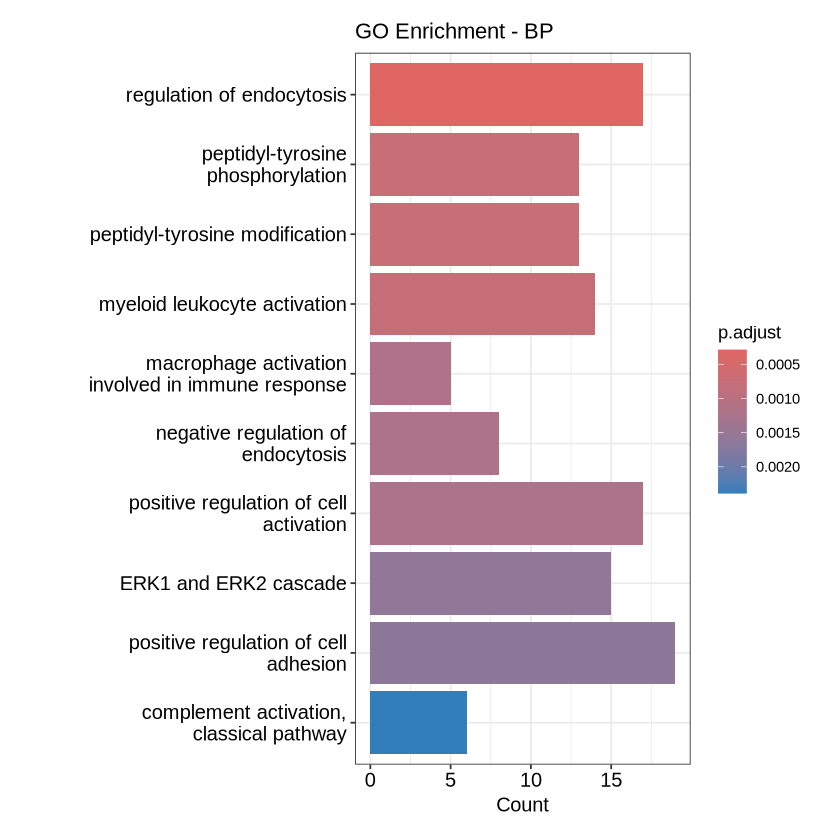

In [19]:
p4 <- barplot(xQTL_ego,
        showCategory = 10,
        title = "GO Enrichment - BP") +
        theme(plot.margin = margin(t = 5, r = 5, b = 5, l = 10, unit = "mm"))
p4

#### xQTL list - KEGG enrichment

In [20]:
entrez_ids <- bitr(xQTL_list$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene = entrez_ids$ENTREZID,
                          organism = 'hsa',
                          pvalueCutoff = 1,
                          qvalueCutoff = 1) 

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(xQTL_list$gene_id, fromType = "ENSEMBL", toType = "ENTREZID", :
“2.08% of input gene IDs are fail to map...”
Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



In [21]:
kegg_enrich %>% head(n=4)

,category,subcategory,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa04610,Organismal Systems,Immune system,hsa04610,Complement and coagulation cascades,7/109,88/9500,0.07954545,6.932861,6.023665,6.378732e-05,0.008816087,0.008239722,1380/1191/5345/716/1604/728/1378,7
hsa04662,Organismal Systems,Immune system,hsa04662,B cell receptor signaling pathway,7/109,91/9500,0.07692308,6.704305,5.890443,7.906804e-05,0.008816087,0.008239722,29760/5595/10859/1380/3635/353514/5336,7
hsa04380,Organismal Systems,Development and regeneration,hsa04380,Osteoclast differentiation,8/109,143/9500,0.05594406,4.875858,5.031110,2.287964e-04,0.017007197,0.015895327,29760/54209/10326/5595/10859/353514/5336/140885,8
hsa04148,Cellular Processes,Transport and catabolism,hsa04148,Efferocytosis,8/109,157/9500,0.05095541,4.441068,4.683777,4.308936e-04,0.024022319,0.022451825,10326/5595/26762/84868/91937/6868/19/140885,8


In [22]:
# KEGG pathways related to lipid
kegg_enrich %>% as.data.frame %>% filter(str_detect(Description, 'lipid|Lipid|fatty|Fatty|Alzheimer|Cholesterol'))

# KEGG pathways related to AD
kegg_enrich %>% as.data.frame %>% filter(str_detect(Description, 'Alzheimer'))

,category,subcategory,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa04979,Organismal Systems,Digestive system,hsa04979,Cholesterol metabolism,3/109,51/9500,0.058823529,5.1268214,3.1834945,0.02054034,0.2544721,0.2378356,341/19/344,3
hsa00604,Metabolism,Glycan biosynthesis and metabolism,hsa00604,Glycosphingolipid biosynthesis - ganglio series,1/109,15/9500,0.066666667,5.8103976,2.0086497,0.15905468,0.7128481,0.6662446,6483,1
hsa05010,Human Diseases,Neurodegenerative disease,hsa05010,Alzheimer disease,7/109,391/9500,0.017902813,1.5603369,1.2189855,0.16192860,0.7128481,0.6662446,5595/1350/83464/351/6868/91252/4722,7
hsa00603,Metabolism,Glycan biosynthesis and metabolism,hsa00603,Glycosphingolipid biosynthesis - globo and isoglobo series,1/109,16/9500,0.062500000,5.4472477,1.9180142,0.16871868,0.7128481,0.6662446,6483,1
hsa00561,Metabolism,Lipid metabolism,hsa00561,Glycerolipid metabolism,2/109,65/9500,0.030769231,2.6817219,1.4656700,0.17101608,0.7128481,0.6662446,55750/1609,2
hsa04071,Environmental Information Processing,Signal transduction,hsa04071,Sphingolipid signaling pathway,2/109,125/9500,0.016000000,1.3944954,0.4783079,0.42173720,0.7584467,0.7088622,5595/2207,2
hsa04932,Human Diseases,Endocrine and metabolic disease,hsa04932,Non-alcoholic fatty liver disease,2/109,157/9500,0.012738854,1.1102670,0.1500889,0.54091494,0.7797889,0.7288091,1350/4722,2
hsa00564,Metabolism,Lipid metabolism,hsa00564,Glycerophospholipid metabolism,1/109,103/9500,0.009708738,0.8461744,-0.1691021,0.69732217,0.8143188,0.7610815,1609,1
hsa05417,Human Diseases,Cardiovascular disease,hsa05417,Lipid and atherosclerosis,2/109,216/9500,0.009259259,0.8069997,-0.3091104,0.71351145,0.8143188,0.7610815,5595/19,2


,category,subcategory,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa05010,Human Diseases,Neurodegenerative disease,hsa05010,Alzheimer disease,7/109,391/9500,0.01790281,1.560337,1.218986,0.1619286,0.7128481,0.6662446,5595/1350/83464/351/6868/91252/4722,7


In [23]:
entrez_ids %>% filter(ENTREZID == '1609') %>% merge(.,gene_ref, by.x = 'ENSEMBL', by.y = 'gene_id')
entrez_ids %>% filter(ENTREZID == '6483') %>% merge(.,gene_ref, by.x = 'ENSEMBL', by.y = 'gene_id')

ENSEMBL,ENTREZID,#chr,start,end,gene_name
<chr>,<chr>,<chr>,<int>,<int>,<chr>
ENSG00000145214,1609,chr4,986894,986895,DGKQ


ENSEMBL,ENTREZID,#chr,start,end,gene_name
<chr>,<chr>,<chr>,<int>,<int>,<chr>
ENSG00000157350,6483,chr16,70439236,70439237,ST3GAL2


In [24]:
entrez_ids %>% filter(ENTREZID%in% (kegg_enrich %>% as.data.frame %>% filter(str_detect(Description, 'Alzheimer')) %>% pull(geneID) %>% str_split(., '/') %>% unlist)) %>% merge(.,gene_ref, by.x = 'ENSEMBL', by.y = 'gene_id')

ENSEMBL,ENTREZID,#chr,start,end,gene_name
<chr>,<chr>,<chr>,<int>,<int>,<chr>
ENSG00000102882,5595,chr16,30123505,30123506,MAPK3
ENSG00000127184,1350,chr5,86617927,86617928,COX7C
ENSG00000138613,83464,chr15,63276017,63276018,APH1B
ENSG00000142192,351,chr21,26171127,26171128,APP
ENSG00000151694,6868,chr2,9556731,9556732,ADAM17
ENSG00000165915,91252,chr11,47407131,47407132,SLC39A13
ENSG00000213619,4722,chr11,47565335,47565336,NDUFS3


Warning message in fortify(object, showCategory = showCategory, by = x, ...):
“Arguments in `...` must be used.
✖ Problematic argument:
• by = x
ℹ Did you misspell an argument name?”


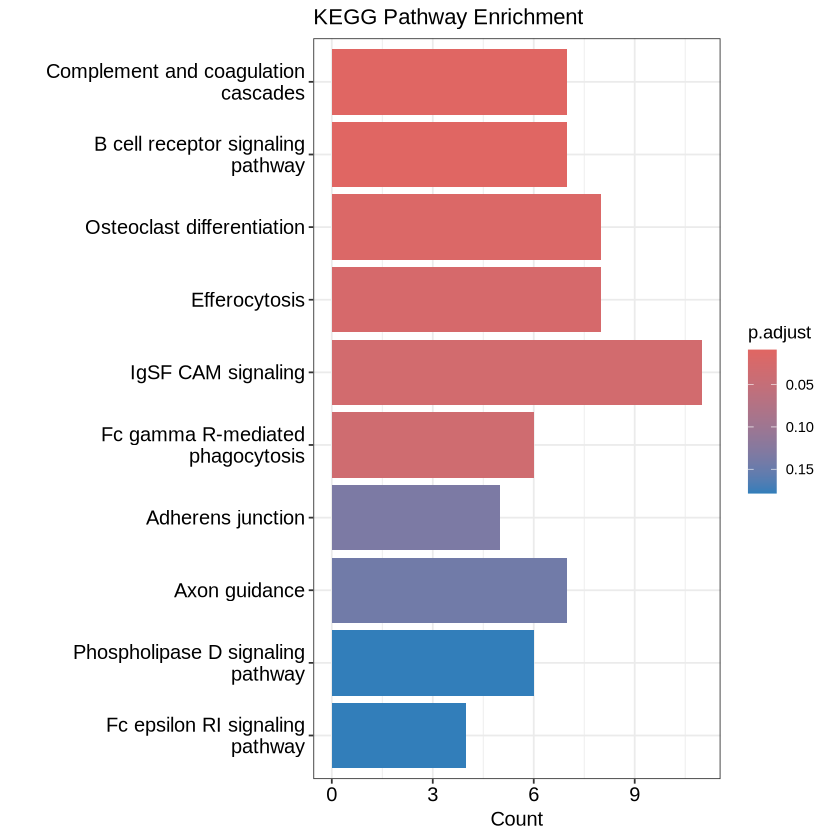

In [25]:
p5 <- barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")
p5

In [26]:
# KEGG pathways related to lysosome functions
kegg_enrich %>%
  as.data.frame() %>%
  filter(str_detect(Description, regex('lysosome|autophagy|endocytosis|phagosome|vacuole|lipid', ignore_case = TRUE))) %>%
  head()

,category,subcategory,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa04142,Cellular Processes,Transport and catabolism,hsa04142,Lysosome,5/109,133/9500,0.03759398,3.276540,2.8483747,0.01829675,0.2544721,0.2378356,23062/1512/3425/53/1508,5
hsa00604,Metabolism,Glycan biosynthesis and metabolism,hsa00604,Glycosphingolipid biosynthesis - ganglio series,1/109,15/9500,0.06666667,5.810398,2.0086497,0.15905468,0.7128481,0.6662446,6483,1
hsa00603,Metabolism,Glycan biosynthesis and metabolism,hsa00603,Glycosphingolipid biosynthesis - globo and isoglobo series,1/109,16/9500,0.06250000,5.447248,1.9180142,0.16871868,0.7128481,0.6662446,6483,1
hsa00561,Metabolism,Lipid metabolism,hsa00561,Glycerolipid metabolism,2/109,65/9500,0.03076923,2.681722,1.4656700,0.17101608,0.7128481,0.6662446,55750/1609,2
hsa04140,Cellular Processes,Transport and catabolism,hsa04140,Autophagy - animal,3/109,169/9500,0.01775148,1.547147,0.7731785,0.30654874,0.7584467,0.7088622,9474/5595/1508,3
hsa04136,Cellular Processes,Transport and catabolism,hsa04136,Autophagy - other,1/109,32/9500,0.03125000,2.723624,1.0521669,0.30918818,0.7584467,0.7088622,9474,1


In [27]:
# KEGG pathways related to neuron function
kegg_enrich %>%
  as.data.frame() %>%
  filter(str_detect(Description, regex('synapse|neuro|axon|dendrite|memory|learning|brain|glutamatergic|GABAergic|cholinergic|dopaminergic|serotonergic', ignore_case = TRUE))) %>%
  head()

,category,subcategory,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa04360,Organismal Systems,Development and regeneration,hsa04360,Axon guidance,7/109,184/9500,0.03804348,3.3157160,3.41724203,0.005169213,0.1440918,0.1346716,8440/5595/5921/2041/3985/23365/5336,7
hsa04722,Organismal Systems,Nervous system,hsa04722,Neurotrophin signaling pathway,3/109,120/9500,0.02500000,2.1788991,1.40010983,0.159094337,0.7128481,0.6662446,4214/5595/5336,3
hsa04726,Organismal Systems,Nervous system,hsa04726,Serotonergic synapse,2/109,115/9500,0.01739130,1.5157559,0.59947661,0.381373569,0.7584467,0.7088622,5595/351,2
hsa04727,Organismal Systems,Nervous system,hsa04727,GABAergic synapse,1/109,89/9500,0.01123596,0.9792805,-0.02115694,0.643662115,0.8143188,0.7610815,4905,1
hsa05022,Human Diseases,Neurodegenerative disease,hsa05022,Pathways of neurodegeneration - multiple diseases,5/109,483/9500,0.01035197,0.9022356,-0.23758518,0.656521221,0.8143188,0.7610815,5595/83544/1350/351/4722,5
hsa04724,Organismal Systems,Nervous system,hsa04724,Glutamatergic synapse,1/109,116/9500,0.00862069,0.7513445,-0.29028816,0.739943926,0.8143188,0.7610815,5595,1


#### Plot AD functional pathway - xQTL list

In [28]:
gene.data <- kegg_enrich %>%
  as.data.frame() %>%
  filter(str_detect(Description, 'Alzheimer')) %>%
  pull(geneID) %>%
  str_split('/') %>%
  unlist()

gene.data <- setNames(as.numeric(rep(1, length(gene.data))), gene.data)

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory /restricted/projectnb/xqtl/jaempawi/xqtl/Figure_5e

Info: Writing image file hsa05010.xQTL_list.png



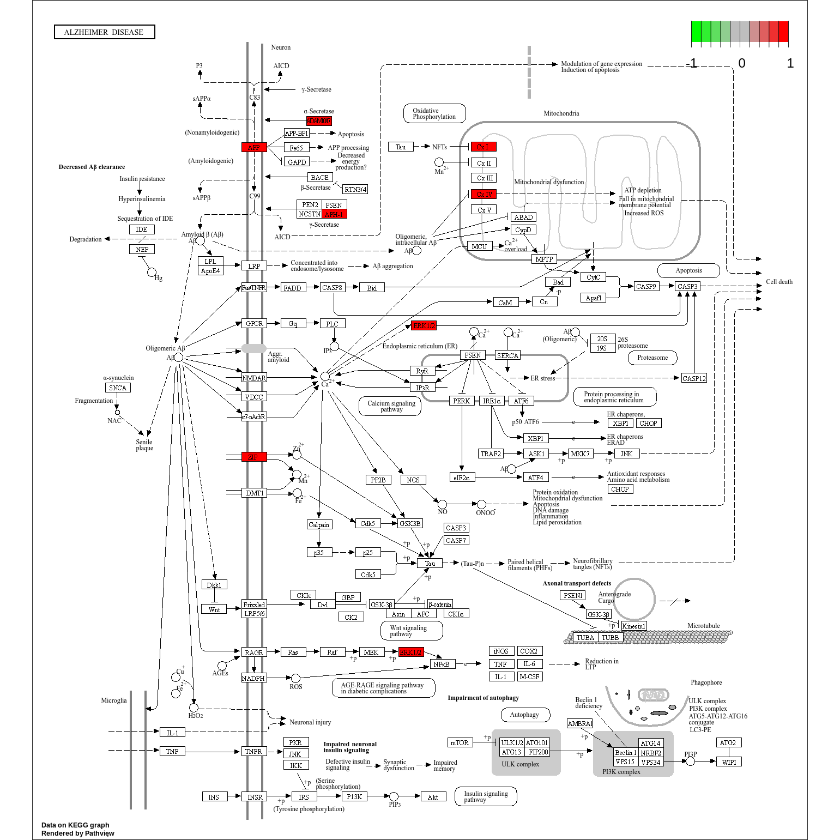

In [61]:
# Generate the pathway plot with highlighted genes
pathview(
  gene.data = gene.data,
  pathway.id = "hsa05010",
  species = "hsa",
  out.suffix = "xQTL_list",
  kegg.native = TRUE
)

p6 <- readPNG(paste0(out,"hsa05010.xQTL_list.png"))
grid.raster(p6)

#### xQTL only list - GO enrichment

In [33]:
xQTL_only <- Reduce(setdiff, list(xQTL_list$gene_id, gvc_list$gene_id, twas_list$gene_id)) # the genes unqiue from xQTL, NOT from gvc and twas
xQTL_only <- xQTL_list %>% filter(gene_id %in% xQTL_only)
xQTL_only %>% pull(resource_in_FunGen_xQTL) %>% table # check their resources from FunGen xQTL

.
                                                  ColocBoost 
                                                         116 
                         ColocBoost,multi_context,multi_gene 
                                                           1 
                                   ColocBoost,single_context 
                                                           1 
                     ColocBoost,single_context,multi_context 
                                                           4 
           ColocBoost,single_context,multi_context,MetaBrain 
                                                           2 
ColocBoost,single_context,multi_context,MetaBrain,multi_gene 
                                                           2 
                        ColocBoost,single_context,multi_gene 
                                                           2 
                                                   MetaBrain 
                                                           1 
      

In [34]:
xqtl_only_ego <- enrichGO(
  gene          = xQTL_only$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)
xqtl_only_ego %>% head

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:1902017,GO:1902017,regulation of cilium assembly,5/134,79/21468,0.06329114,10.139807,6.449964,0.0001368244,0.2839106,0.2720644,ENSG00000057663/ENSG00000103540/ENSG00000136536/ENSG00000138036/ENSG00000182541,5
GO:1902018,GO:1902018,negative regulation of cilium assembly,3/134,21/21468,0.14285714,22.886994,7.952697,0.0002912643,0.3021867,0.2895780,ENSG00000103540/ENSG00000136536/ENSG00000182541,3
GO:0061098,GO:0061098,positive regulation of protein tyrosine kinase activity,3/134,27/21468,0.11111111,17.800995,6.923031,0.0006232667,0.3519492,0.3372642,ENSG00000151694/ENSG00000167191/ENSG00000187116,3
GO:0060271,GO:0060271,cilium assembly,9/134,414/21468,0.02173913,3.482803,4.042752,0.0011843190,0.3519492,0.3372642,ENSG00000057663/ENSG00000103540/ENSG00000112981/ENSG00000119661/ENSG00000121289/ENSG00000136536/ENSG00000138036/ENSG00000157423/ENSG00000182541,9
GO:0048284,GO:0048284,organelle fusion,6/134,190/21468,0.03157895,5.059230,4.454070,0.0012493623,0.3519492,0.3372642,ENSG00000102879/ENSG00000103496/ENSG00000127419/ENSG00000140379/ENSG00000168993/ENSG00000272636,6
GO:0031338,GO:0031338,regulation of vesicle fusion,3/134,39/21468,0.07692308,12.323766,5.609500,0.0018438764,0.3519492,0.3372642,ENSG00000102879/ENSG00000168993/ENSG00000272636,3


In [35]:
# GO term related to amyloid
xqtl_only_ego %>% as.data.frame %>% filter(str_detect(Description, 'amyloid'))

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0097242,GO:0097242,amyloid-beta clearance,1/134,48/21468,0.020833333,3.337687,1.2849881,0.2598321,0.5057707,0.4846675,ENSG00000197405,1
GO:0042987,GO:0042987,amyloid precursor protein catabolic process,1/134,88/21468,0.011363636,1.820556,0.6112907,0.4242761,0.5988932,0.5739045,ENSG00000151694,1
GO:0042982,GO:0042982,amyloid precursor protein metabolic process,1/134,117/21468,0.008547009,1.369307,0.3174488,0.5202920,0.6574944,0.6300606,ENSG00000151694,1


In [36]:
amyloid_genes <- (xqtl_only_ego %>% as.data.frame %>% filter(str_detect(Description, 'amyloid')) %>% pull(geneID) %>% str_split(., '/') %>% unlist )
gene_ref %>% filter(gene_id %in% amyloid_genes)

#chr,start,end,gene_id,gene_name
<chr>,<int>,<int>,<chr>,<chr>
chr2,9556731,9556732,ENSG00000151694,ADAM17
chr19,47290022,47290023,ENSG00000197405,C5AR1


Warning message in fortify(object, showCategory = showCategory, by = x, ...):
“Arguments in `...` must be used.
✖ Problematic argument:
• by = x
ℹ Did you misspell an argument name?”


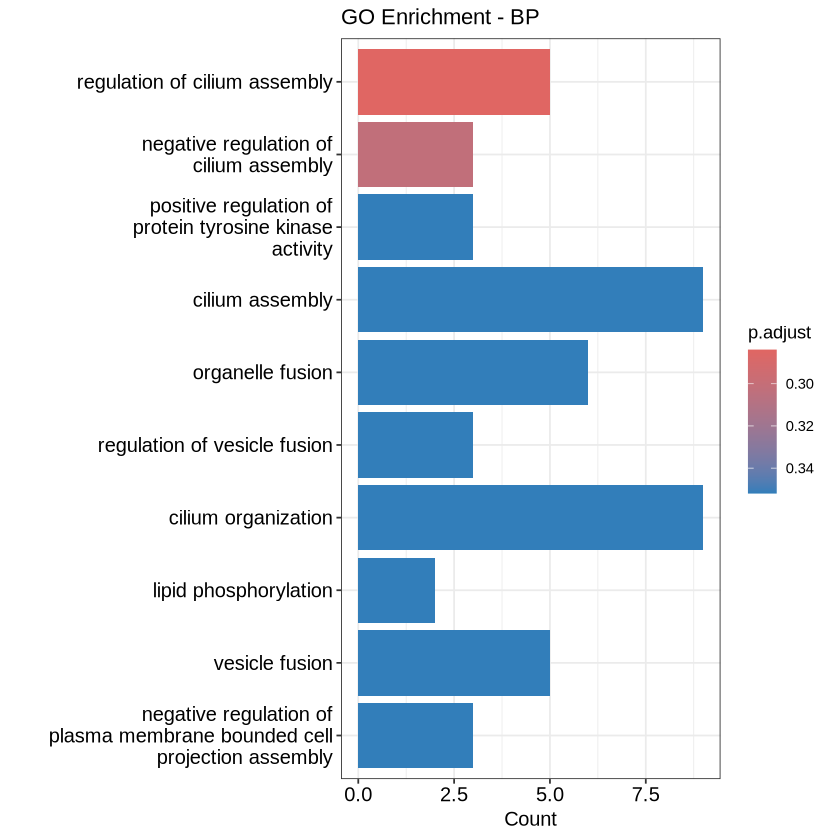

In [37]:
p7 <- barplot(xqtl_only_ego, showCategory = 10, title = "GO Enrichment - BP")
p7

#### xQTL only list - KEGG enrichment

In [38]:
entrez_ids <- bitr(xQTL_only$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich_only <- enrichKEGG(gene = entrez_ids$ENTREZID,
                          organism = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(xQTL_only$gene_id, fromType = "ENSEMBL", toType = "ENTREZID", :
“1.32% of input gene IDs are fail to map...”


In [39]:
# KEGG pathway related to lipid
kegg_enrich_only %>% as.data.frame %>% filter(str_detect(Description, 'lipid|Lipid|fatty|Fatty|Alzheimer|Cholesterol'))

# KEGG pathway related to AD
kegg_enrich_only %>% as.data.frame %>% filter(str_detect(Description, 'Alzheimer'))

,category,subcategory,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa00561,Metabolism,Lipid metabolism,hsa00561,Glycerolipid metabolism,2/61,65/9500,0.030769231,4.7919294,2.465964585,0.06519292,0.7597669,0.7597669,55750/1609,2
hsa00604,Metabolism,Glycan biosynthesis and metabolism,hsa00604,Glycosphingolipid biosynthesis - ganglio series,1/61,15/9500,0.066666667,10.3825137,2.923391875,0.09216973,0.7597669,0.7597669,6483,1
hsa00603,Metabolism,Glycan biosynthesis and metabolism,hsa00603,Glycosphingolipid biosynthesis - globo and isoglobo series,1/61,16/9500,0.062500000,9.7336066,2.810597854,0.09800817,0.7597669,0.7597669,6483,1
hsa00564,Metabolism,Lipid metabolism,hsa00564,Glycerophospholipid metabolism,1/61,103/9500,0.009708738,1.5120166,0.419999592,0.48680549,0.7609784,0.7609784,1609,1
hsa04932,Human Diseases,Endocrine and metabolic disease,hsa04932,Non-alcoholic fatty liver disease,1/61,157/9500,0.006369427,0.9919599,-0.008165988,0.63932545,0.7850910,0.7850910,1350,1
hsa05010,Human Diseases,Neurodegenerative disease,hsa05010,Alzheimer disease,2/61,391/9500,0.005115090,0.7966123,-0.330155532,0.72230917,0.8273290,0.8273290,1350/6868,2


,category,subcategory,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa05010,Human Diseases,Neurodegenerative disease,hsa05010,Alzheimer disease,2/61,391/9500,0.00511509,0.7966123,-0.3301555,0.7223092,0.827329,0.827329,1350/6868,2


In [40]:
# KEGG pathway related to neurogenerative
kegg_enrich_only %>% as.data.frame %>% filter(str_detect(subcategory, 'Neurodegenerative'))

,category,subcategory,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa05016,Human Diseases,Neurodegenerative disease,hsa05016,Huntington disease,3/61,311/9500,0.009646302,1.5022930,0.7240091,0.3224258,0.7597669,0.7597669,7019/83544/1350,3
hsa05014,Human Diseases,Neurodegenerative disease,hsa05014,Amyotrophic lateral sclerosis,2/61,371/9500,0.005390836,0.8395564,-0.2534187,0.6946760,0.8157663,0.8157663,83544/1350,2
hsa05010,Human Diseases,Neurodegenerative disease,hsa05010,Alzheimer disease,2/61,391/9500,0.005115090,0.7966123,-0.3301555,0.7223092,0.8273290,0.8273290,1350/6868,2
hsa05022,Human Diseases,Neurodegenerative disease,hsa05022,Pathways of neurodegeneration - multiple diseases,2/61,483/9500,0.004140787,0.6448766,-0.6439656,0.8239888,0.8430245,0.8430245,83544/1350,2
hsa05012,Human Diseases,Neurodegenerative disease,hsa05012,Parkinson disease,1/61,271/9500,0.003690037,0.5746779,-0.5710395,0.8298522,0.8430245,0.8430245,1350,1
hsa05020,Human Diseases,Neurodegenerative disease,hsa05020,Prion disease,1/61,278/9500,0.003597122,0.5602076,-0.5982717,0.8375726,0.8441676,0.8441676,1350,1


In [41]:
entrez_ids %>% filter(ENTREZID%in% (kegg_enrich %>% as.data.frame %>% filter(str_detect(Description, 'Alzheimer')) %>% pull(geneID) %>% str_split(., '/') %>% unlist)) %>% merge(.,gene_ref, by.x = 'ENSEMBL', by.y = 'gene_id')

ENSEMBL,ENTREZID,#chr,start,end,gene_name
<chr>,<chr>,<chr>,<int>,<int>,<chr>
ENSG00000127184,1350,chr5,86617927,86617928,COX7C
ENSG00000151694,6868,chr2,9556731,9556732,ADAM17


Warning message in fortify(object, showCategory = showCategory, by = x, ...):
“Arguments in `...` must be used.
✖ Problematic argument:
• by = x
ℹ Did you misspell an argument name?”


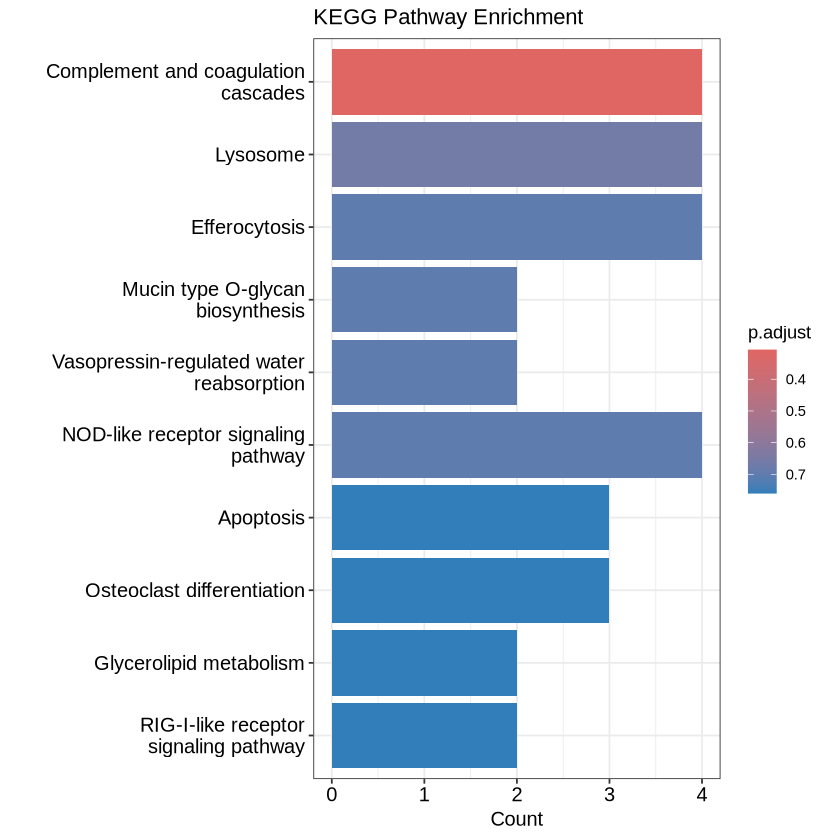

In [42]:
p8 <- barplot(kegg_enrich_only, showCategory = 10, title = "KEGG Pathway Enrichment")
p8

In [43]:
# xQTL list
gene.data 

5595  1350 83464   351  6868 91252  4722 
    1     1     1     1     1     1     1

In [44]:
gene.data[names(gene.data) %in% c('1350', '6868')] <- 2

# xQTL list highlight xQTL only
gene.data_xqtl_only <- gene.data 
gene.data_xqtl_only 

5595  1350 83464   351  6868 91252  4722 
    1     2     1     1     2     1     1

#### Plot AD functional pathway - xQTL only list

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory /restricted/projectnb/xqtl/jaempawi/xqtl/Figure_5e

Info: Writing image file hsa05010.xQTL_only.png



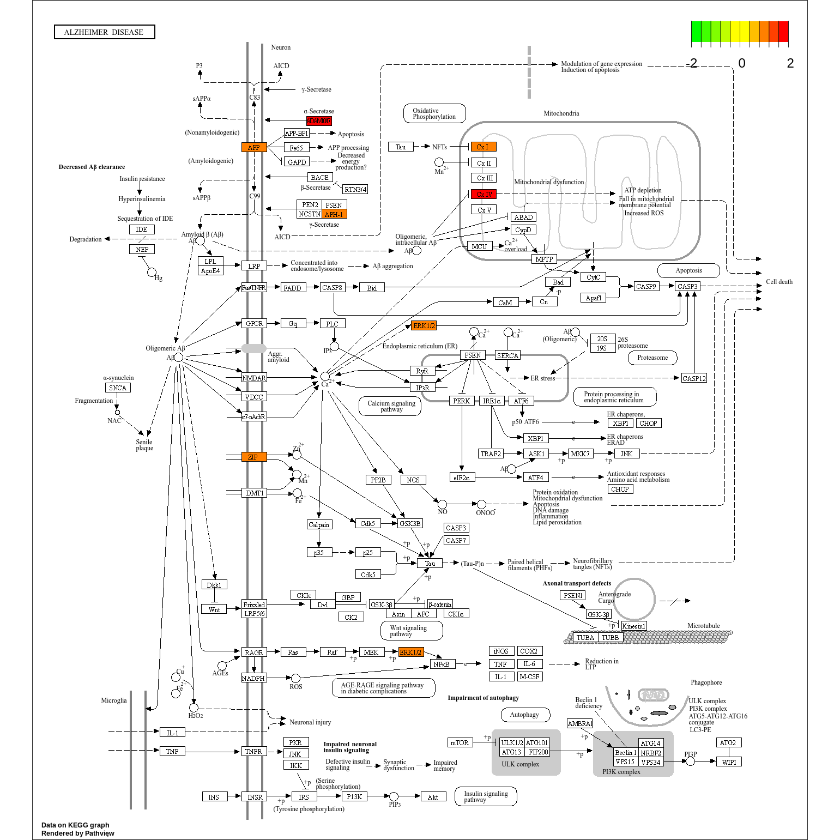

In [45]:
# Make sure gene.data is numeric named vector with correct format and proper range for color mapping
pathview(
  gene.data = gene.data_xqtl_only,
  pathway.id = "hsa05010",
  species = "hsa",
  out.suffix = "xQTL_only",
  kegg.native = TRUE,
  limit = list(gene = max(abs(gene.data))),  # set gene color scale limit properly
  low = "green",
  mid = "yellow",
  high = "red",
  na.col = "white"   # color for genes without data
)

p9 <- readPNG(paste0(out,"hsa05010.xQTL_only.png"))
grid.raster(p9)

#### TWAS only list 

In [46]:
twas_diff_list <- Reduce(setdiff, list(twas_list$gene_id, gene_list$gene_id, gvc_list$gene_id)) # the genes unqiue from twas, NOT from gvc and xQTL

In [47]:
twas_diff_ego <- enrichGO(
  gene          = twas_diff_list,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)
twas_diff_ego %>% head

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0030198,GO:0030198,extracellular matrix organization,14/241,394/21468,0.03553299,3.165238,4.622002,0.0001577333,0.1373759,0.1301456,ENSG00000060718/ENSG00000069399/ENSG00000082293/ENSG00000085998/ENSG00000104884/ENSG00000111799/ENSG00000120708/ENSG00000133392/ENSG00000135862/ENSG00000154175/ENSG00000164692/ENSG00000178031/ENSG00000187498/ENSG00000196569,14
GO:0043062,GO:0043062,extracellular structure organization,14/241,395/21468,0.03544304,3.157225,4.610846,0.0001619230,0.1373759,0.1301456,ENSG00000060718/ENSG00000069399/ENSG00000082293/ENSG00000085998/ENSG00000104884/ENSG00000111799/ENSG00000120708/ENSG00000133392/ENSG00000135862/ENSG00000154175/ENSG00000164692/ENSG00000178031/ENSG00000187498/ENSG00000196569,14
GO:0045229,GO:0045229,external encapsulating structure organization,14/241,397/21468,0.03526448,3.141319,4.588640,0.0001705919,0.1373759,0.1301456,ENSG00000060718/ENSG00000069399/ENSG00000082293/ENSG00000085998/ENSG00000104884/ENSG00000111799/ENSG00000120708/ENSG00000133392/ENSG00000135862/ENSG00000154175/ENSG00000164692/ENSG00000178031/ENSG00000187498/ENSG00000196569,14
GO:0009743,GO:0009743,response to carbohydrate,11/241,268/21468,0.04104478,3.656221,4.662443,0.0002366086,0.1373759,0.1301456,ENSG00000010310/ENSG00000012061/ENSG00000012232/ENSG00000075391/ENSG00000121691/ENSG00000127616/ENSG00000136504/ENSG00000145242/ENSG00000156711/ENSG00000169375/ENSG00000225697,11
GO:0009650,GO:0009650,UV protection,3/241,12/21468,0.25000000,22.269710,7.852857,0.0002852094,0.1373759,0.1301456,ENSG00000012061/ENSG00000104884/ENSG00000121691,3
GO:0051458,GO:0051458,corticotropin secretion,3/241,12/21468,0.25000000,22.269710,7.852857,0.0002852094,0.1373759,0.1301456,ENSG00000120088/ENSG00000166128/ENSG00000263715,3


Warning message in fortify(object, showCategory = showCategory, by = x, ...):
“Arguments in `...` must be used.
✖ Problematic argument:
• by = x
ℹ Did you misspell an argument name?”


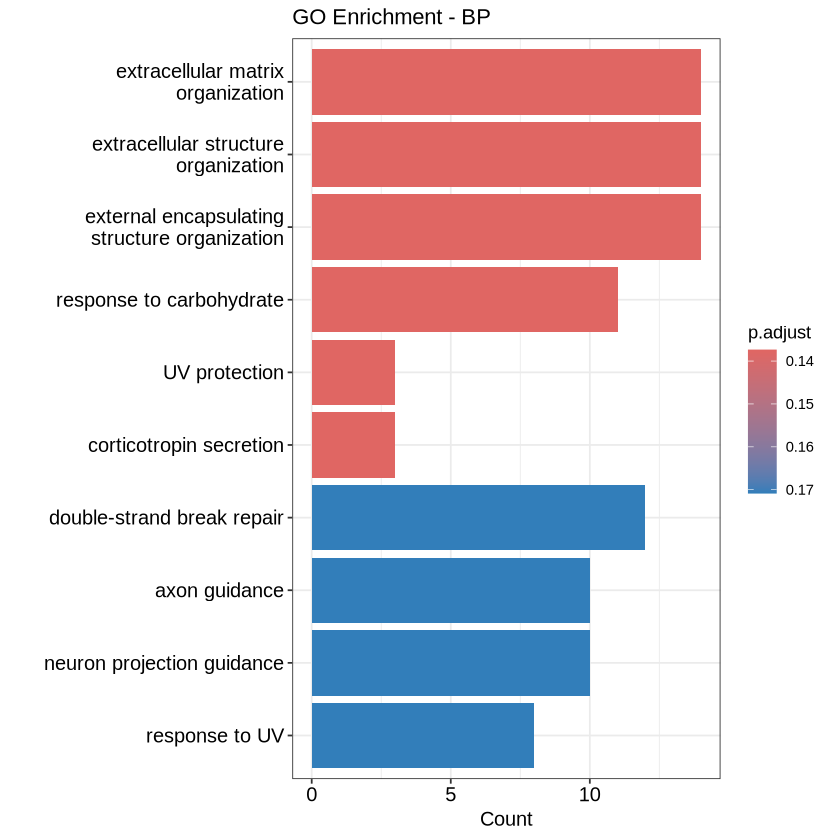

In [48]:
p10 <- barplot(twas_diff_ego, showCategory = 10, title = "GO Enrichment - BP")
p10

In [49]:
# GO terms related to amyloid
twas_diff_ego %>% as.data.frame %>% filter(str_detect(Description, 'amyloid'))

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0050435,GO:0050435,amyloid-beta metabolic process,2/241,74/21468,0.027027027,2.4075362,1.29234753,0.2018268,0.5890547,0.5580518,ENSG00000119912/ENSG00000125744,2
GO:1902430,GO:1902430,negative regulation of amyloid-beta formation,1/241,31/21468,0.032258065,2.8735109,1.11225652,0.2954673,0.6241184,0.5912701,ENSG00000125744,1
GO:1902992,GO:1902992,negative regulation of amyloid precursor protein catabolic process,1/241,33/21468,0.030303030,2.6993587,1.04095075,0.3112197,0.6365357,0.6030339,ENSG00000125744,1
GO:0097242,GO:0097242,amyloid-beta clearance,1/241,48/21468,0.020833333,1.8558091,0.63246674,0.4187029,0.6748753,0.6393556,ENSG00000119912,1
GO:1902003,GO:1902003,regulation of amyloid-beta formation,1/241,57/21468,0.017543860,1.5627866,0.45332808,0.4749947,0.6887781,0.6525266,ENSG00000125744,1
GO:1990000,GO:1990000,amyloid fibril formation,1/241,64/21468,0.015625000,1.3918568,0.33451827,0.5149950,0.7043009,0.6672324,ENSG00000186868,1
GO:0034205,GO:0034205,amyloid-beta formation,1/241,66/21468,0.015151515,1.3496794,0.30315496,0.5258557,0.7099329,0.6725680,ENSG00000125744,1
GO:1902991,GO:1902991,regulation of amyloid precursor protein catabolic process,1/241,71/21468,0.014084507,1.2546315,0.22898909,0.5519594,0.7214666,0.6834947,ENSG00000125744,1
GO:0042987,GO:0042987,amyloid precursor protein catabolic process,1/241,88/21468,0.011363636,1.0122595,0.01227894,0.6304635,0.7601333,0.7201263,ENSG00000125744,1


#### multi gene case - YPEL3

In [50]:
# multi_gene_list <- c('YPEL3', 'INO80E', 'DOC2A', 'MAPK3', 'CORO1A', 'BCKDK', 'TLCD3B', 'ZNF267')
multi_gene_list <- c('ENSG00000090238','ENSG00000169592','ENSG00000149927','ENSG00000102879','ENSG00000149930','ENSG00000149932','ENSG00000102882','ENSG00000103507','ENSG00000149926','ENSG00000185947', 'ENSG00000285043', 'ENSG00000052344')

In [51]:
gene_ref %>% filter(gene_id %in% multi_gene_list)

#chr,start,end,gene_id,gene_name
<chr>,<int>,<int>,<chr>,<chr>
chr16,29940884,29940885,ENSG00000149932,TMEM219
chr16,29973867,29973868,ENSG00000149930,TAOK2
chr16,29995714,29995715,ENSG00000169592,INO80E
chr16,30023269,30023270,ENSG00000149927,DOC2A
chr16,30052977,30052978,ENSG00000149926,TLCD3B
chr16,30053089,30053090,ENSG00000285043,AC093512.2
chr16,30096914,30096915,ENSG00000090238,YPEL3
chr16,30123505,30123506,ENSG00000102882,MAPK3
chr16,30182826,30182827,ENSG00000102879,CORO1A


In [52]:
multigene_ego <- enrichGO(
  gene          = multi_gene_list,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)
multigene_ego %>% head

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0031338,GO:0031338,regulation of vesicle fusion,2/11,39/21468,0.05128205,100.08392,14.02271,0.0001750475,0.02450869,0.01500532,ENSG00000149927/ENSG00000102879,2
GO:0032872,GO:0032872,regulation of stress-activated MAPK cascade,2/11,39/21468,0.05128205,100.08392,14.02271,0.0001750475,0.02450869,0.01500532,ENSG00000149930/ENSG00000102882,2
GO:0070302,GO:0070302,regulation of stress-activated protein kinase signaling cascade,2/11,41/21468,0.04878049,95.20177,13.66998,0.0001936015,0.02450869,0.01500532,ENSG00000149930/ENSG00000102882,2
GO:0051403,GO:0051403,stress-activated MAPK cascade,2/11,53/21468,0.03773585,73.64666,11.98925,0.0003242554,0.02450869,0.01500532,ENSG00000149930/ENSG00000102882,2
GO:0098927,GO:0098927,vesicle-mediated transport between endosomal compartments,2/11,53/21468,0.03773585,73.64666,11.98925,0.0003242554,0.02450869,0.01500532,ENSG00000102879/ENSG00000102882,2
GO:0031098,GO:0031098,stress-activated protein kinase signaling cascade,2/11,57/21468,0.03508772,68.47847,11.54999,0.0003751330,0.02450869,0.01500532,ENSG00000149930/ENSG00000102882,2


Warning message in fortify(object, showCategory = showCategory, by = x, ...):
“Arguments in `...` must be used.
✖ Problematic argument:
• by = x
ℹ Did you misspell an argument name?”


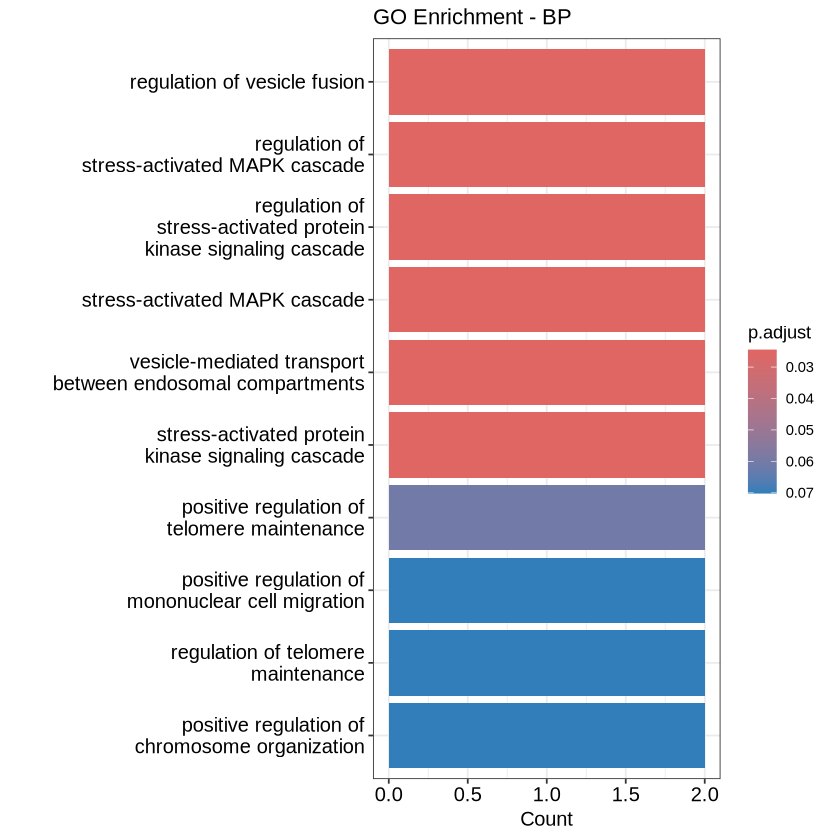

In [53]:
p11 <- barplot(multigene_ego, showCategory = 10, title = "GO Enrichment - BP")
p11

In [54]:
multigene_ego %>% as.data.frame %>% filter(str_detect(Description, 'amyloid'))

ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>


In [55]:
entrez_ids <- bitr(multi_gene_list, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich_YPEL3_only <- enrichKEGG(gene = entrez_ids$ENTREZID,
                          organism = 'hsa',
                          pvalueCutoff = 1,
                          qvalueCutoff = 1)
kegg_enrich_YPEL3_only %>% head

'select()' returned 1:1 mapping between keys and columns



,category,subcategory,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa05152,Human Diseases,Infectious disease: bacterial,hsa05152,Tuberculosis,2/5,182/9500,0.010989011,20.87912,6.213667,0.003514051,0.115229,0.08721112,11151/5595,2
hsa04010,Environmental Information Processing,Signal transduction,hsa04010,MAPK signaling pathway,2/5,300/9500,0.006666667,12.66667,4.711834,0.009330871,0.115229,0.08721112,9344/5595,2
hsa05216,Human Diseases,Cancer: specific types,hsa05216,Thyroid cancer,1/5,37/9500,0.027027027,51.35135,7.041644,0.019326622,0.115229,0.08721112,5595,1
hsa04960,Organismal Systems,Excretory system,hsa04960,Aldosterone-regulated sodium reabsorption,1/5,38/9500,0.026315789,50.00000,6.945010,0.019844784,0.115229,0.08721112,5595,1
hsa05219,Human Diseases,Cancer: specific types,hsa05219,Bladder cancer,1/5,41/9500,0.024390244,46.34146,6.676384,0.021397956,0.115229,0.08721112,5595,1
hsa04930,Human Diseases,Endocrine and metabolic disease,hsa04930,Type II diabetes mellitus,1/5,47/9500,0.021276596,40.42553,6.217533,0.024498393,0.115229,0.08721112,5595,1


Warning message in fortify(object, showCategory = showCategory, by = x, ...):
“Arguments in `...` must be used.
✖ Problematic argument:
• by = x
ℹ Did you misspell an argument name?”


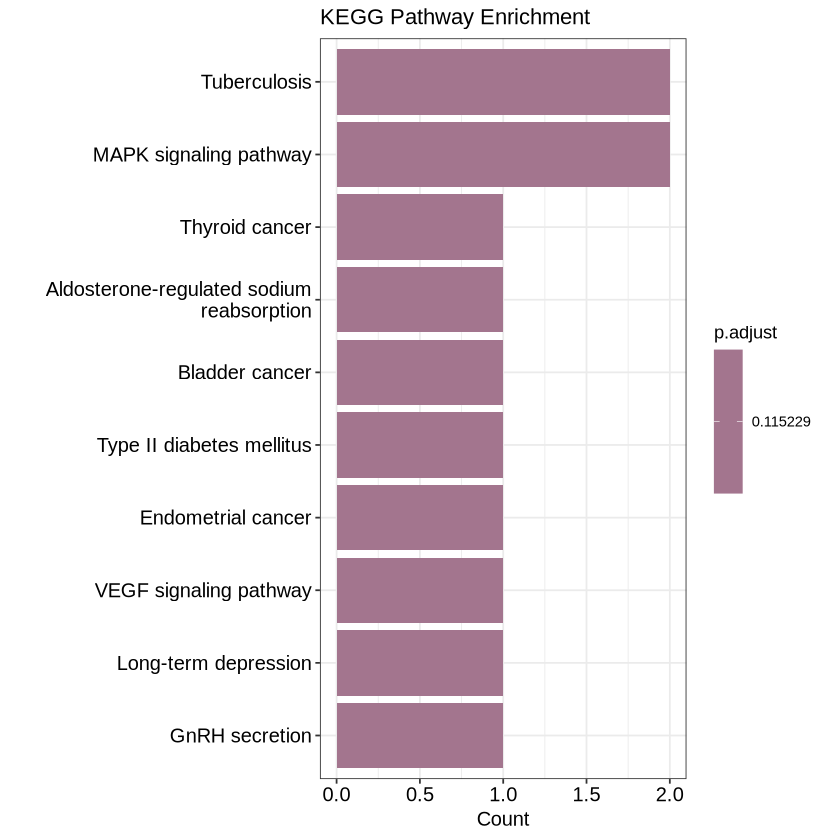

In [56]:
p12 <- barplot(kegg_enrich_YPEL3_only, showCategory = 10, title = "KEGG Pathway Enrichment")
p12

#### multi gene case - NBEAL1

In [57]:
multi_gene_list2 <- c('WDR81', 'TSC22D4', 'ICA1L', 'FAM117B', 'NBEAL1', 'CARF', 'WDR12', "DHX33", "EMG1", "DYSF")
multi_gene_list2 <- gene_ref %>% filter(gene_name %in% multi_gene_list2) %>% pull(gene_id)

In [58]:
multigene_ego2 <- enrichGO(
  gene          = multi_gene_list2,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)
multigene_ego2 %>% as.data.frame %>% arrange(desc(Count))

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0006364,GO:0006364,rRNA processing,2/9,251/21468,0.007968127,19.00664,5.876649,0.004643224,0.06692227,0.03734407,ENSG00000138442/ENSG00000126749,2
GO:0016072,GO:0016072,rRNA metabolic process,2/9,297/21468,0.006734007,16.06285,5.353242,0.006440237,0.06692227,0.03734407,ENSG00000138442/ENSG00000126749,2
GO:0042254,GO:0042254,ribosome biogenesis,2/9,357/21468,0.005602241,13.36321,4.824066,0.009189526,0.06692227,0.03734407,ENSG00000138442/ENSG00000126749,2
GO:0070475,GO:0070475,rRNA base methylation,1/9,11/21468,0.090909091,216.84848,14.664357,0.004602930,0.06692227,0.03734407,ENSG00000126749,1
GO:0042117,GO:0042117,monocyte activation,1/9,18/21468,0.055555556,132.51852,11.431723,0.007522253,0.06692227,0.03734407,ENSG00000135636,1
GO:0000463,GO:0000463,"maturation of LSU-rRNA from tricistronic rRNA transcript (SSU-rRNA, 5.8S rRNA, LSU-rRNA)",1/9,19/21468,0.052631579,125.54386,11.122382,0.007938677,0.06692227,0.03734407,ENSG00000138442,1
GO:0007000,GO:0007000,nucleolus organization,1/9,19/21468,0.052631579,125.54386,11.122382,0.007938677,0.06692227,0.03734407,ENSG00000126749,1
GO:0035973,GO:0035973,aggrephagy,1/9,20/21468,0.050000000,119.26667,10.836428,0.008354946,0.06692227,0.03734407,ENSG00000167716,1
GO:0050765,GO:0050765,negative regulation of phagocytosis,1/9,24/21468,0.041666667,99.38889,9.876452,0.010018470,0.06692227,0.03734407,ENSG00000135636,1


Warning message in fortify(object, showCategory = showCategory, by = x, ...):
“Arguments in `...` must be used.
✖ Problematic argument:
• by = x
ℹ Did you misspell an argument name?”


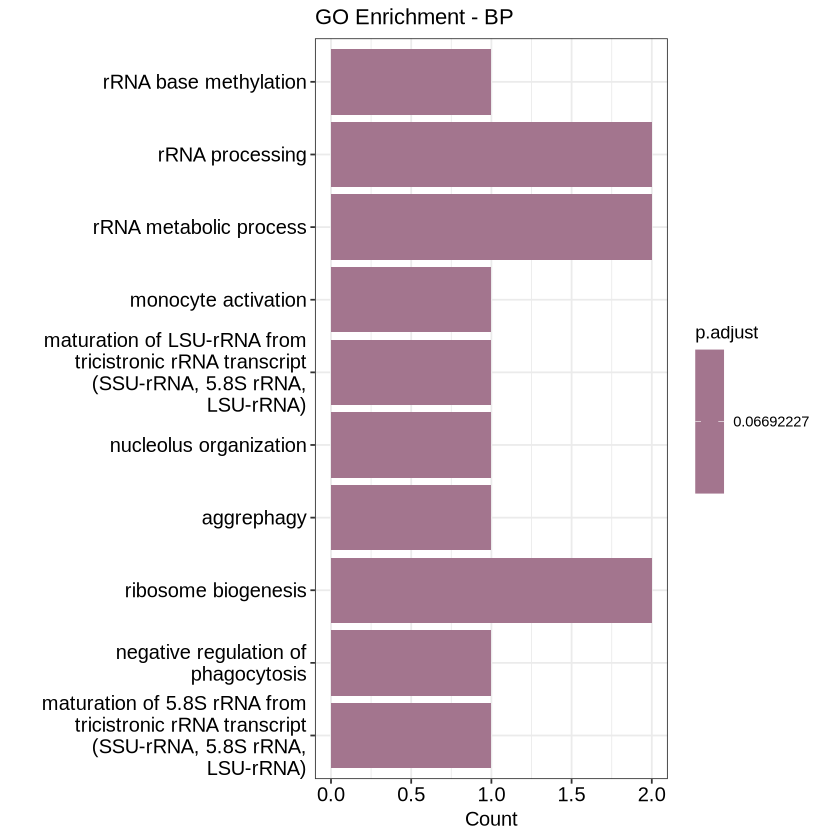

In [59]:
p13 <- barplot(multigene_ego2, showCategory = 10, title = "GO Enrichment - BP")
p13

In [60]:
entrez_ids <- bitr(multi_gene_list2, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich_NBEAL1_only <- enrichKEGG(gene = entrez_ids$ENTREZID,
                          organism = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)
kegg_enrich_NBEAL1_only %>% head

'select()' returned 1:1 mapping between keys and columns



,category,subcategory,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<int>
hsa04621,Organismal Systems,Immune system,hsa04621,NOD-like receptor signaling pathway,1/2,189/9500,0.005291005,25.13228,4.862604,0.03939573,0.03939573,NA,56919,1
